In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

mlb_data = pd.read_csv('Resources/mlb_data.csv')
mlb_data.head()

,Year-Tm,Year,Tm,Lg,W-L%,R/G-hit,HR-hit,RBI-hit,SB-hit,BB-hit,...,OPS-hit,LOB-hit,OPS+-hit,ERA-pitch,WHIP-pitch,H9-pitch,HR9-pitch,SO/W-pitch,ERA+-pitch,Winner
0,2019MIN,2019,MIN,AL,0.623,5.80,307,906,28,525,...,0.832,1115,119,4.18,1.304,9.0,1.2,3.24,108,False
1,2019NYY,2019,NYY,AL,0.636,5.82,306,904,55,569,...,0.829,1039,117,4.31,1.304,8.6,1.5,3.03,106,False
2,2019HOU,2019,HOU,AL,0.660,5.68,288,891,67,645,...,0.848,1168,120,3.66,1.130,7.4,1.4,3.73,127,False
3,2019LAD,2019,LAD,NL,0.654,5.47,279,861,57,607,...,0.810,1124,112,3.39,1.102,7.5,1.2,3.88,123,False
4,2018NYY,2018,NYY,AL,0.617,5.25,267,821,63,625,...,0.781,1100,112,3.78,1.239,8.1,1.1,3.31,112,False


In [3]:
data = mlb_data.copy()

winners = pd.get_dummies(data, columns=["Winner"])
winners.head()

,Year-Tm,Year,Tm,Lg,W-L%,R/G-hit,HR-hit,RBI-hit,SB-hit,BB-hit,...,LOB-hit,OPS+-hit,ERA-pitch,WHIP-pitch,H9-pitch,HR9-pitch,SO/W-pitch,ERA+-pitch,Winner_False,Winner_True
0,2019MIN,2019,MIN,AL,0.623,5.80,307,906,28,525,...,1115,119,4.18,1.304,9.0,1.2,3.24,108,1,0
1,2019NYY,2019,NYY,AL,0.636,5.82,306,904,55,569,...,1039,117,4.31,1.304,8.6,1.5,3.03,106,1,0
2,2019HOU,2019,HOU,AL,0.660,5.68,288,891,67,645,...,1168,120,3.66,1.130,7.4,1.4,3.73,127,1,0
3,2019LAD,2019,LAD,NL,0.654,5.47,279,861,57,607,...,1124,112,3.39,1.102,7.5,1.2,3.88,123,1,0
4,2018NYY,2018,NYY,AL,0.617,5.25,267,821,63,625,...,1100,112,3.78,1.239,8.1,1.1,3.31,112,1,0


In [4]:
# Drop extra dummy columns

### BEGIN SOLUTION
mlb_update = winners.drop(columns=['Winner_False'])
mlb_update.head()
### END SOLUTION

,Year-Tm,Year,Tm,Lg,W-L%,R/G-hit,HR-hit,RBI-hit,SB-hit,BB-hit,...,OPS-hit,LOB-hit,OPS+-hit,ERA-pitch,WHIP-pitch,H9-pitch,HR9-pitch,SO/W-pitch,ERA+-pitch,Winner_True
0,2019MIN,2019,MIN,AL,0.623,5.80,307,906,28,525,...,0.832,1115,119,4.18,1.304,9.0,1.2,3.24,108,0
1,2019NYY,2019,NYY,AL,0.636,5.82,306,904,55,569,...,0.829,1039,117,4.31,1.304,8.6,1.5,3.03,106,0
2,2019HOU,2019,HOU,AL,0.660,5.68,288,891,67,645,...,0.848,1168,120,3.66,1.130,7.4,1.4,3.73,127,0
3,2019LAD,2019,LAD,NL,0.654,5.47,279,861,57,607,...,0.810,1124,112,3.39,1.102,7.5,1.2,3.88,123,0
4,2018NYY,2018,NYY,AL,0.617,5.25,267,821,63,625,...,0.781,1100,112,3.78,1.239,8.1,1.1,3.31,112,0


In [5]:
mlb_corr = mlb_update.corr()
mlb_corr.unstack().sort_values()

SO/W-pitch   WHIP-pitch    -0.820219
WHIP-pitch   SO/W-pitch    -0.820219
ERA+-pitch   ERA-pitch     -0.773213
ERA-pitch    ERA+-pitch    -0.773213
WHIP-pitch   ERA+-pitch    -0.728100
                              ...   
             WHIP-pitch     1.000000
H9-pitch     H9-pitch       1.000000
HR9-pitch    HR9-pitch      1.000000
OBP-hit      OBP-hit        1.000000
Winner_True  Winner_True    1.000000
Length: 441, dtype: float64

In [6]:
mlb_corr = mlb_corr[abs(mlb_corr) >= 0.01].stack().reset_index()
mlb_corr = mlb_corr[mlb_corr['level_0'].astype(str)!=mlb_corr['level_1'].astype(str)]
 # filtering out lower/upper triangular duplicates 
mlb_corr['ordered-cols'] = mlb_corr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
mlb_corr = mlb_corr.drop_duplicates(['ordered-cols'])
mlb_corr.drop(['ordered-cols'], axis=1, inplace=True)
 mlb_corr.sort_values(by=[0], ascending=False).head(10) #Get 10 highest correlation of pairwaise attributes

,level_0,level_1,0
215,SLG-hit,OPS-hit,0.969749
49,R/G-hit,OPS-hit,0.951254
48,R/G-hit,SLG-hit,0.913055
301,ERA-pitch,WHIP-pitch,0.898360
194,OBP-hit,OPS-hit,0.887847
322,WHIP-pitch,H9-pitch,0.887061
47,R/G-hit,OBP-hit,0.862793
132,BB-hit,LOB-hit,0.829649
302,ERA-pitch,H9-pitch,0.824674
171,BA-hit,OBP-hit,0.820573


In [7]:
# Assign the data to X and y

X = mlb_update[["W-L%","R/G-hit","HR-hit","RBI-hit","SB-hit","BB-hit","SO-hit","BA-hit","OBP-hit","SLG-hit","OPS-hit",
                "LOB-hit","OPS+-hit","ERA-pitch","WHIP-pitch","H9-pitch","HR9-pitch","SO/W-pitch","ERA+-pitch"]] 
y = mlb_update["Winner_True"].values.reshape(-1, 1)
print(X.shape, y.shape)

(630, 19) (630, 1)


In [8]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [11]:
# Create the model using LinearRegression and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

In [12]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10830372110781483
Testing Score: -0.04458035708183461


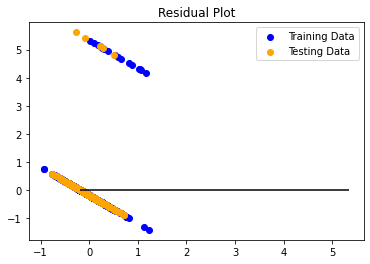

MSE: 239.38316833739336, R2: -0.04458035708176822


In [13]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")

In [14]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 0.22303252 -0.17022621 -0.58832095  0.4378948   0.0725336  -0.0146225
  -0.06084039 -0.20572566  1.48983991  3.82473911 -4.85321916  0.15016802
   0.26107681  0.19066391  0.13058391 -0.22893838  0.02622969  0.01057481
   0.09100076]]
y-axis intercept:  [9.10304238e-15]


In [15]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9192344967413191, R2: 0.017619166103146955


In [16]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9324460689125019, R2: 0.0035000318315059342


In [17]:
predictions = lasso.predict(X_test_scaled)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0]
Predicted output: -0.21001276543507963
Prediction Error: [-0.21001277]


In [55]:
df = pd.DataFrame({"Predicted": [predictions.round(2)], "Actual": [y], "Error": [predictions.round(2) - y]})[["Predicted", "Actual", "Error"]]
print(df)

                                           Predicted  \
0  [-0.21, 0.1, -0.06, -0.06, -0.21, -0.36, 0.03,...   

                                              Actual  \
0  [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...   

                                               Error  
0  [[-0.21, 0.1, -0.06, -0.06, -0.21, -0.36, 0.03...  


In [ ]:
# Assign the data to X and y

X = mlb_update[["R/G-hit","HR-hit","RBI-hit","SB-hit","BB-hit","SO-hit","BA-hit","OBP-hit","SLG-hit","OPS-hit",
                "LOB-hit","OPS+-hit","ERA-pitch","WHIP-pitch","H9-pitch","HR9-pitch","SO/W-pitch","ERA+-pitch"]] 
y = mlb_update["W-L%"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [ ]:
# Create the model using LinearRegression and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
predictions = elasticnet.predict(X_test_scaled)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [ ]:
pd.DataFrame({"Predicted": predictions, "Actual": [0], "Error": predictions[0]-y[0])[["Predicted", "Actual", "Error"]]